6132 Курицын Никита  
Лабораторная работа №5: 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.model_selection import GridSearchCV

1. Считать в pandas.DataFrame любой источник данных: CSV, JSON, Excel-файл, HTML-таблицу и т.п.

In [2]:
data = pd.read_csv('Cancer_Data.csv')# считываем с помощью метода read_csv и помещяем данные в data

2. Датасет и подготовка данных:

Привести описание датасета.

Этот датасет содержит характеристики клеток, которые используются для диагностики рака молочной железы. Краткое описание столбцов в датасете:

1. **id**: Уникальный идентификатор для каждой записи.
2. **diagnosis**: Диагноз, который может быть "M" (злокачественный) или "B" (доброкачественный).
3. **radius_mean**: Средний радиус ядра клетки.
4. **texture_mean**: Средняя текстура клетки (измеряется как стандартное отклонение значений интенсивности).
5. **perimeter_mean**: Средний периметр клетки.
6. **area_mean**: Средняя площадь клетки.
7. **smoothness_mean**: Средняя гладкость клеточной поверхности (измеряется как стандартное отклонение радиальных длин).
8. **compactness_mean**: Средняя компактность клетки (вычисляется как периметр^2 / площадь - 1.0).
9. **concavity_mean**: Средняя вогнутость клеточной поверхности (глубина вогнутых частей клеточной поверхности).
10. **concave points_mean**: Среднее количество вогнутых точек на клеточной поверхности.
11. **texture_worst**: Характеристика текстуры для самой худшей части клетки.
12. **perimeter_worst**: Характеристика периметра для самой худшей части клетки.
13. **area_worst**: Характеристика площади для самой худшей части клетки.
14. **smoothness_worst**: Характеристика гладкости для самой худшей части клетки.
15. **compactness_worst**: Характеристика компактности для самой худшей части клетки.
16. **concavity_worst**: Характеристика вогнутости для самой худшей части клетки.
17. **concave points_worst**: Характеристика вогнутых точек для самой худшей части клетки.
18. **symmetry_worst**: Характеристика симметрии для самой худшей части клетки.
19. **fractal_dimension_worst**: Характеристика фрактальной размерности для самой худшей части клетки.

In [3]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,...,radius_max,texture_max,perimeter_max,area_max,smoothness_max,compactness_max,concavity_max,concave_points_max,symmetry_max,fractal_dimension_max
0,842302,M,17.99,NaN,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,NaN,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,NaN,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,NaN,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      569 non-null    int64  
 1   diagnosis               569 non-null    object 
 2   radius_mean             569 non-null    float64
 3   texture_mean            548 non-null    float64
 4   perimeter_mean          569 non-null    float64
 5   area_mean               569 non-null    float64
 6   smoothness_mean         521 non-null    float64
 7   compactness_mean        569 non-null    float64
 8   concavity_mean          569 non-null    float64
 9   concave_points_mean     569 non-null    float64
 10  symmetry_mean           504 non-null    float64
 11  fractal_dimension_mean  569 non-null    float64
 12  radius_SE               569 non-null    float64
 13  texture_SE              548 non-null    float64
 14  perimeter_SE            569 non-null    fl

In [5]:
data.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,...,radius_max,texture_max,perimeter_max,area_max,smoothness_max,compactness_max,concavity_max,concave_points_max,symmetry_max,fractal_dimension_max
count,5.690000e+02,569.000000,548.000000,569.000000,569.000000,521.000000,569.000000,569.000000,569.000000,504.000000,...,569.000000,548.000000,569.000000,569.000000,521.000000,569.000000,569.000000,569.000000,504.000000,569.000000
mean,3.051467e+07,14.113021,19.293431,91.877909,653.288576,0.096087,0.104536,0.088620,0.048837,0.181091,...,16.261896,25.660803,107.211142,880.163796,0.132090,0.254557,0.271681,0.114377,0.288856,0.084012
std,1.250417e+08,3.506148,4.327287,24.162787,349.476899,0.013924,0.052674,0.079011,0.038578,0.027899,...,4.841175,6.202916,33.621975,570.498628,0.022685,0.158042,0.208298,0.065760,0.062520,0.018151
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.691040e+05,11.700000,16.167500,75.170000,420.300000,0.086050,0.065260,0.029560,0.020360,0.161800,...,13.010000,21.017500,84.110000,515.300000,0.116600,0.146000,0.112500,0.064020,0.247650,0.071270
50%,9.060240e+05,13.370000,18.785000,86.340000,551.100000,0.095780,0.094530,0.061550,0.033700,0.178950,...,14.970000,25.370000,97.650000,686.500000,0.131200,0.211900,0.226700,0.100100,0.280650,0.080040
75%,8.910251e+06,15.780000,21.825000,103.800000,782.700000,0.104800,0.130500,0.131900,0.074040,0.195750,...,18.760000,29.675000,125.100000,1070.000000,0.145000,0.339900,0.385300,0.162500,0.317525,0.092110
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


Осуществить предобработку данных (избавиться от null, убрать некоторые признаки и т.п.) - "подчистить данные".

In [6]:
data = pd.read_csv('Cancer_Data.csv')
data = data.drop('id',axis=1)
data['diagnosis'] = data['diagnosis'].replace({'M': 0, 'B': 1})
data = data.fillna(data.mean())

C:\Users\nikit\AppData\Local\Temp\ipykernel_8100\2233182124.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['diagnosis'] = data['diagnosis'].replace({'M': 0, 'B': 1})


In [7]:
data['diagnosis'].value_counts()

diagnosis
1    358
0    211
Name: count, dtype: int64

Нормализовать численные данные.

In [8]:
scaler = MinMaxScaler()
data = pd.DataFrame(scaler.fit_transform(data),columns=data.columns)

Визуализировать heatmap-матрицу кореллированности признаков.

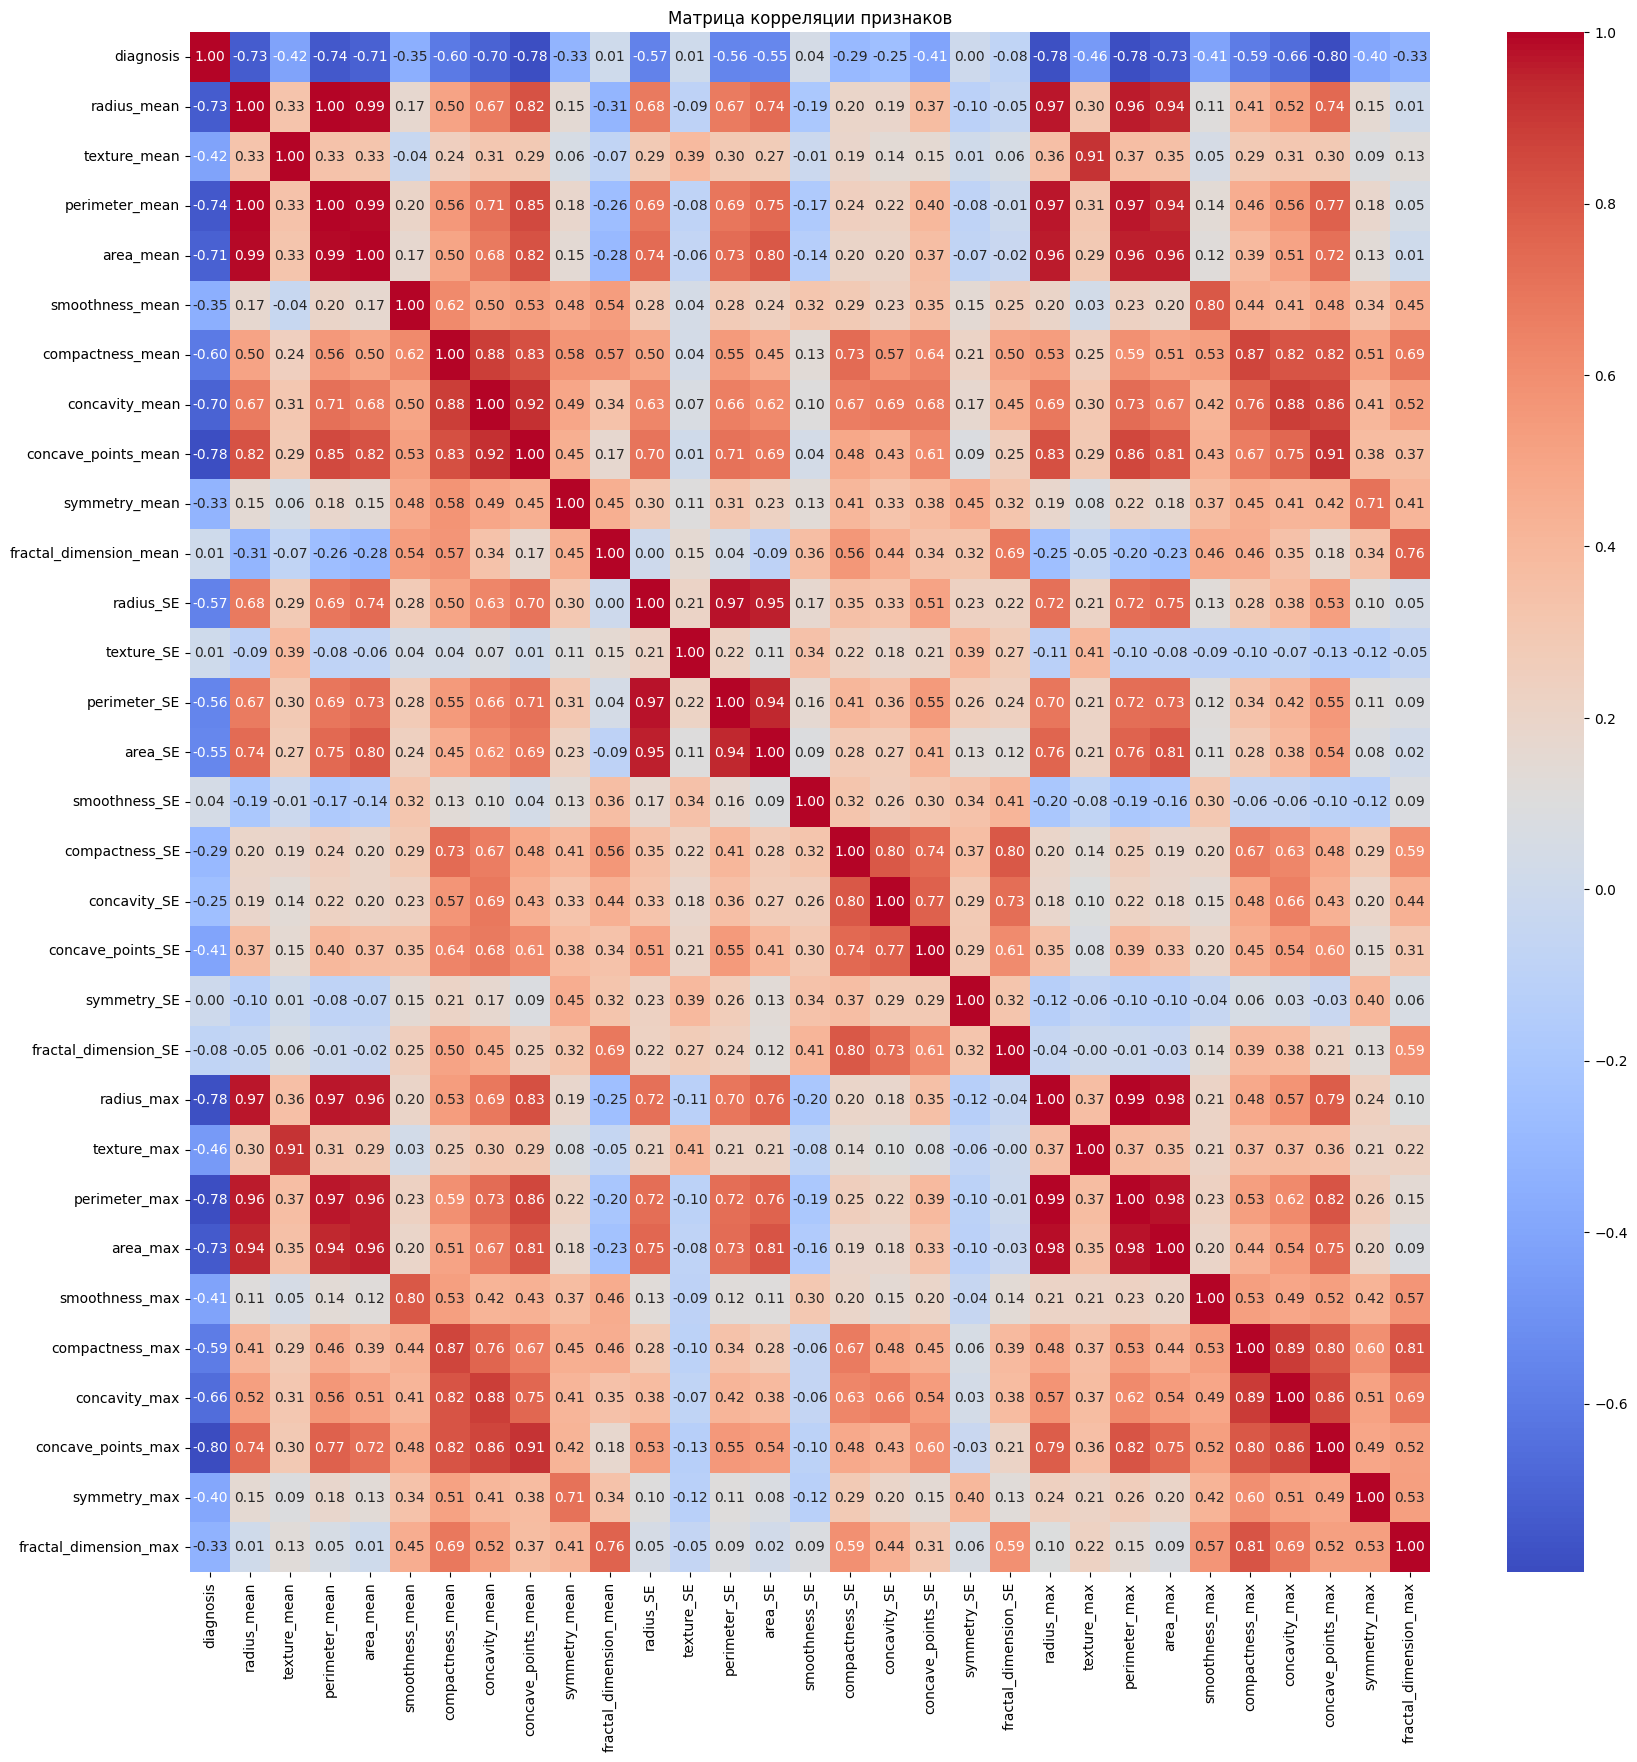

In [9]:
corr_matrix = data.corr()
plt.figure(figsize=(20, 20))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Матрица корреляции признаков')
plt.show()

Визуализировать взаимосвязь между target-переменной и каждым из признаком (с использованием srs.pairplot или pandas.plotting.scatter_matrix). Лучше всего построить диаграмму попарного распределения между таргетом и каждым из признаков отдельно (пример с sns.FacetGrid в лекции).

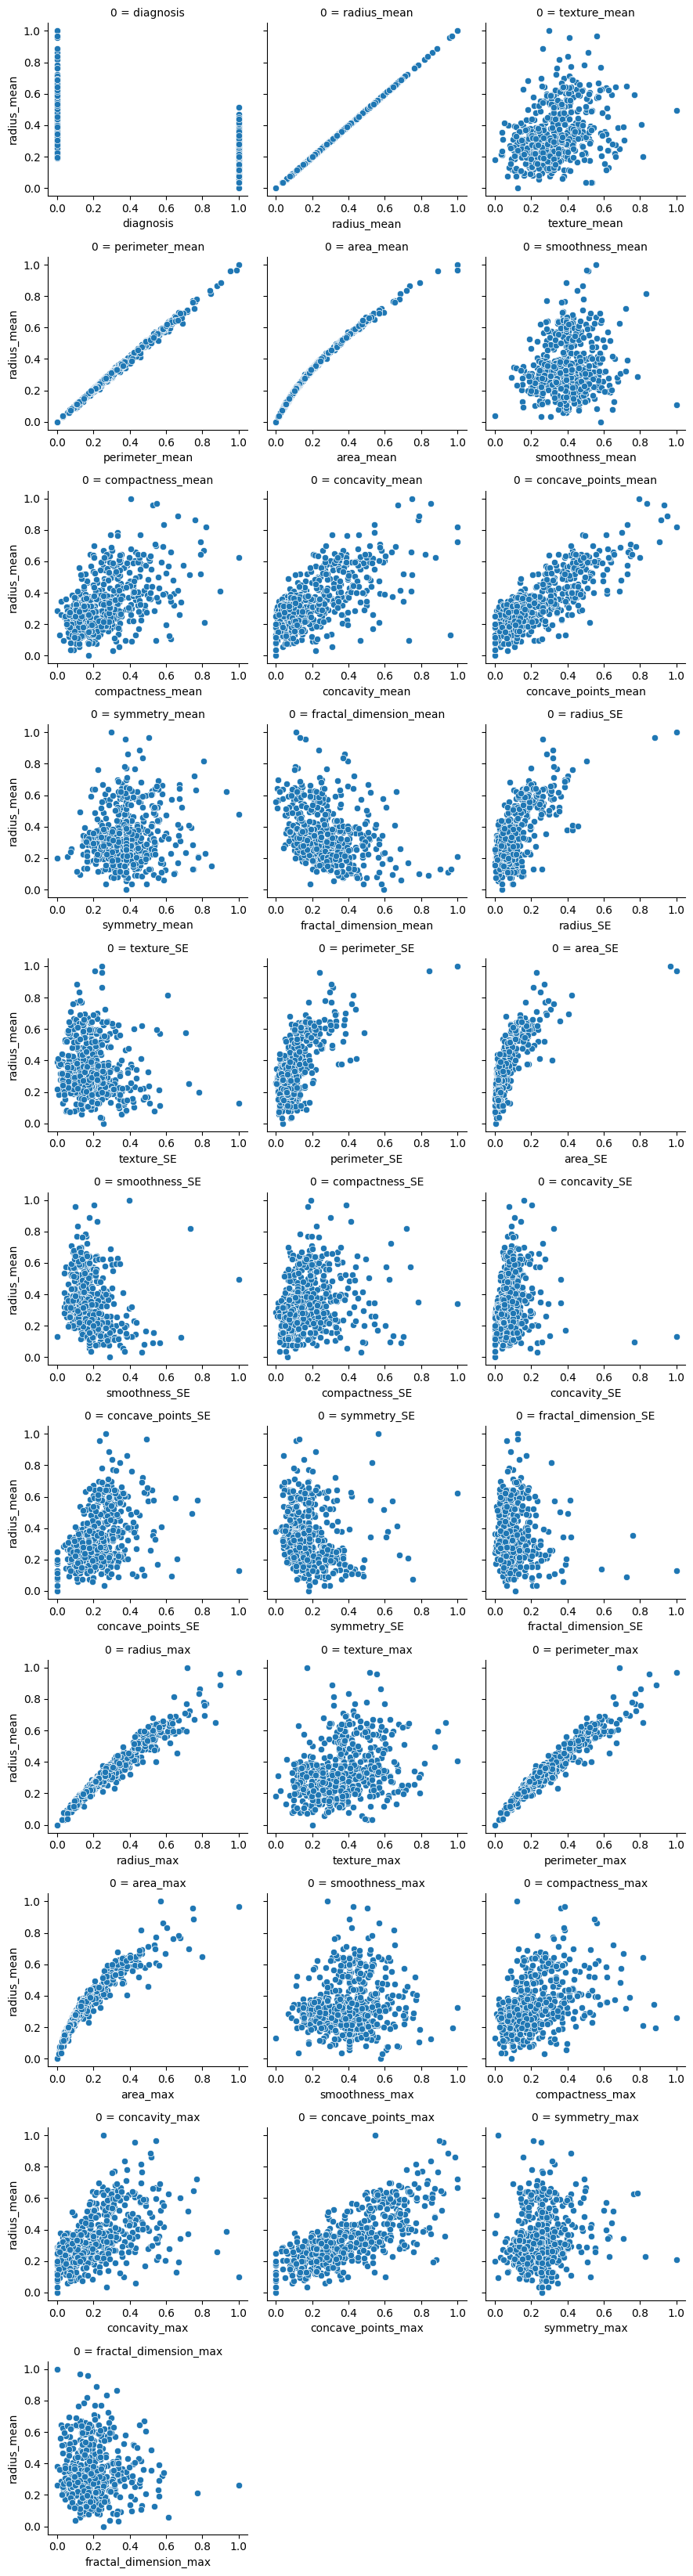

In [11]:
target = 'radius_mean'
fig = sns.FacetGrid(pd.DataFrame(list(data.columns.values)), col = 0, col_wrap=3, sharex=False)
for ax, varx in zip(fig.axes, list(data.columns.values)):
    sns.scatterplot(data=data, x=varx, y=target, ax=ax)
fig.tight_layout()

Разбить выборку на обучающую и тестовую.

In [12]:
X = data.drop(columns = ['radius_mean'])
y = data['radius_mean']

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [15]:
print(f"Тренировочная выборка имеет {X_train.shape[0]} экземпляров и {X_train.shape[1]} признаков\nЧисло разных классов --> {np.bincount(y_train)}")
print("--------------------")
print(f"Тестовая выборка имеет {X_test.shape[0]} экземпляров и {X_test.shape[1]} признаков\nЧисло разных классов --> {np.bincount(y_test)}")

Тренировочная выборка имеет 455 экземпляров и 30 признаков
Число разных классов --> [454   1]
--------------------
Тестовая выборка имеет 114 экземпляров и 30 признаков
Число разных классов --> [114]


3. Регрессия МНК:
   - Обучить модель линейной регрессии `LinearRegression`.
   - Вывести метрики $MSE$, $MAE$ и $R^2$ на тестовом наборе.
   - Вывести `model.coef_` и `model.intercept_`.
   - Построить график (`barh`) с важностью коэфициентов при соответствующих признаках (сверху вниз расположены коэффициенты по убыванию, а названия соответствующих признаков подписаны по вертикальной оси). оси).

Средняя квадратичная ошибка (MSE): 1.0804776489454385e-05
Средняя абсолютная ошибка (MAE): 0.0020711077543254645
Коэффициент детерминации (R^2 Score): 0.9996032661525319
Коэффициенты: [ 9.27997599e-04  1.17597618e-04  9.35160276e-01  9.20344193e-02
  8.93425054e-03 -6.09690991e-02 -2.78775280e-02 -3.37276745e-03
  3.51113282e-03  1.09309834e-02  1.63203797e-02  5.76530387e-04
 -4.05507446e-02  1.71984519e-03  2.63638353e-03 -7.35066020e-04
  1.86813090e-02  7.08096448e-03  4.94789348e-03 -6.18307335e-03
  2.16821865e-01 -4.88440583e-04 -1.01378550e-01 -1.06853716e-01
 -5.98659845e-03  1.40051951e-02  2.86023121e-03  2.42877244e-03
 -3.48007646e-03 -6.55669761e-03]
Свободный член (Intercept): 0.002193442684904956


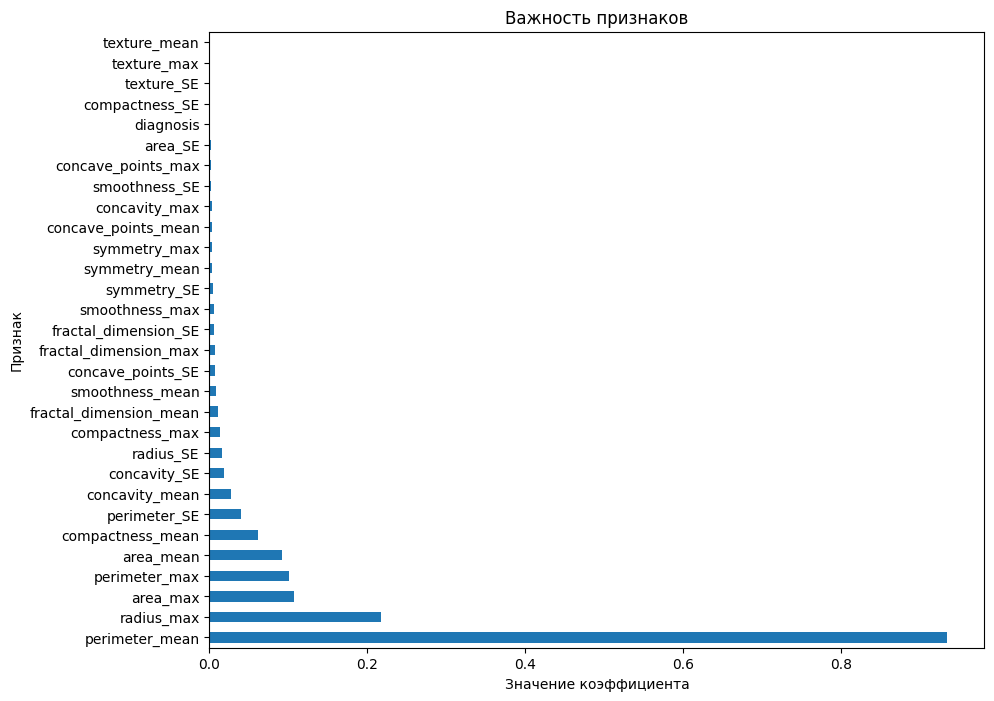

In [17]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Средняя квадратичная ошибка (MSE):", mse)
print("Средняя абсолютная ошибка (MAE):", mae)
print("Коэффициент детерминации (R^2 Score):", r2)
print("Коэффициенты:", model.coef_)
print("Свободный член (Intercept):", model.intercept_)


coef_importance = pd.Series(model.coef_, index=X.columns)
coef_importance_sorted = coef_importance.abs().sort_values(ascending=False)

plt.figure(figsize=(10, 8))
coef_importance_sorted.plot(kind='barh')
plt.title('Важность признаков')
plt.xlabel('Значение коэффициента')
plt.ylabel('Признак')
plt.show()

4. Для каждого вида регрессии (`Ridge`, `LASSO`, `Elastic Net`):
   - С использованием `GridSearchCV` осуществить подбор параметров регуляризации (`alpha` для `Ridge` и `LASSO`, `alpha` и `l1_ratio` для `Elastic Net`)
   - Вывести значения гиперпараметров, коэффициенты регрессии (`model.coef_` и `model.intercept_`) и значения метрик на тестовом наборе для наилучшей модели ($MSE$, $MAE$ и $R^2$).
   - Построить график (`barh`) с важностью коэфициентов при соответствующих признаках (сверху вниз расположены коэффициенты по убыванию, а названия соответствующих признаков подписаны по вертикальной оси).  

In [18]:
def func_grid(models,x_train,x_test,y_train,y_test):
    best_models = {}

    
    for name,[model,params] in models.items():
        grid = GridSearchCV(model, params, cv=5)
        grid.fit(x_train, y_train)
    
        best_models[name] = [model,grid.best_params_]
       
    
        y_pred = grid.predict(x_test)
        mse = mean_squared_error(y_test, y_pred)
        mae = mean_absolute_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)
    
        print(f"--- {name} ---")
        print("Лучшие гиперпараметры:", grid.best_params_)
        print("Средняя квадратичная ошибка (MSE):", mse)
        print("Средняя абсолютная ошибка (MAE):", mae)
        print("Коэффициент детерминации (R^2 Score):", r2)
        print("Коэффициенты регрессии:", grid.best_estimator_.coef_)
        print("Свободный член (Intercept):", grid.best_estimator_.intercept_)
    
        # Построение графика с важностью коэффициентов
        coef_importance = pd.Series(grid.best_estimator_.coef_, index=X.columns)
        coef_importance_sorted = coef_importance.abs().sort_values(ascending=False)
    
        plt.figure(figsize=(10, 8))
        coef_importance_sorted.plot(kind='barh')
        plt.title(f'Важность признаков для {name}')
        plt.xlabel('Значение коэффициента')
        plt.ylabel('Признак')
        plt.show()
    return best_models

--- Ridge ---
Лучшие гиперпараметры: {'alpha': 0.001}
Средняя квадратичная ошибка (MSE): 1.038829635370644e-05
Средняя абсолютная ошибка (MAE): 0.0020585952612643173
Коэффициент детерминации (R^2 Score): 0.9996185586268196
Коэффициенты регрессии: [ 8.71743732e-04  8.30907989e-04  9.08098311e-01  1.14980281e-01
  9.42176355e-03 -5.76539260e-02 -2.70608332e-02 -4.07471810e-03
  3.36363559e-03  9.57180682e-03  1.58373312e-02  1.27923802e-03
 -4.64358723e-02  5.50557574e-03  2.29754622e-03 -6.20156431e-04
  1.69008403e-02  8.61352714e-03  4.78338010e-03 -5.88084201e-03
  2.24675428e-01 -1.50109702e-03 -8.73496738e-02 -1.25514611e-01
 -6.56012699e-03  1.24700954e-02  2.95880602e-03  1.92030868e-03
 -3.46822527e-03 -6.31078882e-03]
Свободный член (Intercept): 0.0034549145812811655


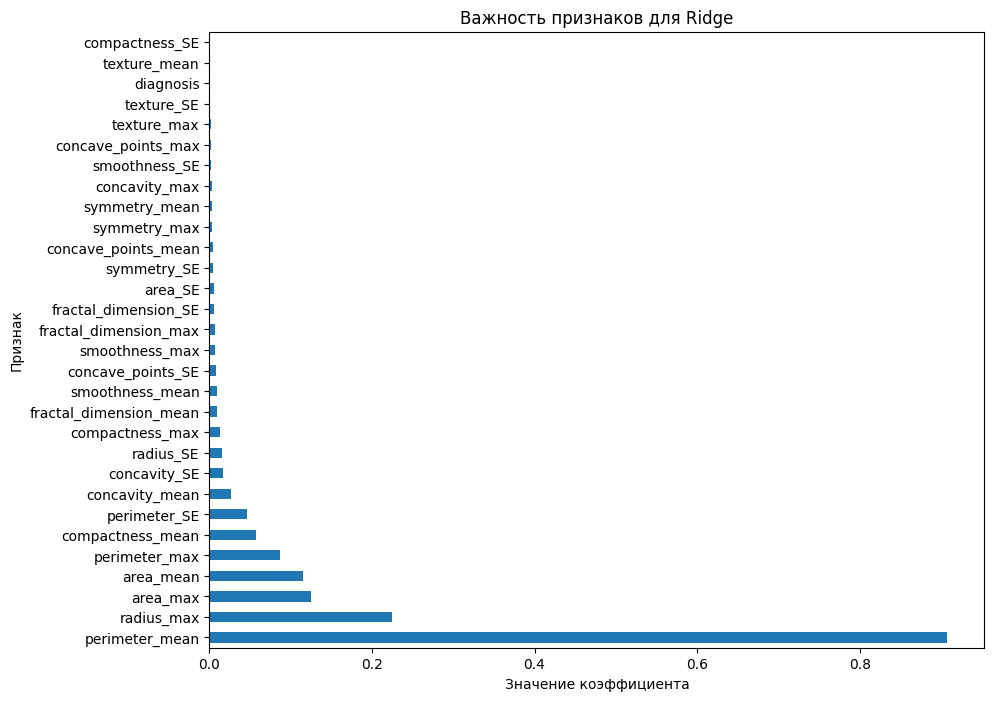

--- LASSO ---
Лучшие гиперпараметры: {'alpha': 0.001}
Средняя квадратичная ошибка (MSE): 8.303338764643732e-05
Средняя абсолютная ошибка (MAE): 0.007089739409465815
Коэффициент детерминации (R^2 Score): 0.9969511488385314
Коэффициенты регрессии: [-0.00412658  0.          0.93487602  0.         -0.         -0.
 -0.          0.         -0.         -0.02741788  0.         -0.
  0.          0.         -0.         -0.         -0.         -0.
 -0.         -0.          0.00742704  0.          0.          0.
 -0.         -0.         -0.          0.         -0.         -0.        ]
Свободный член (Intercept): 0.03484518437240419


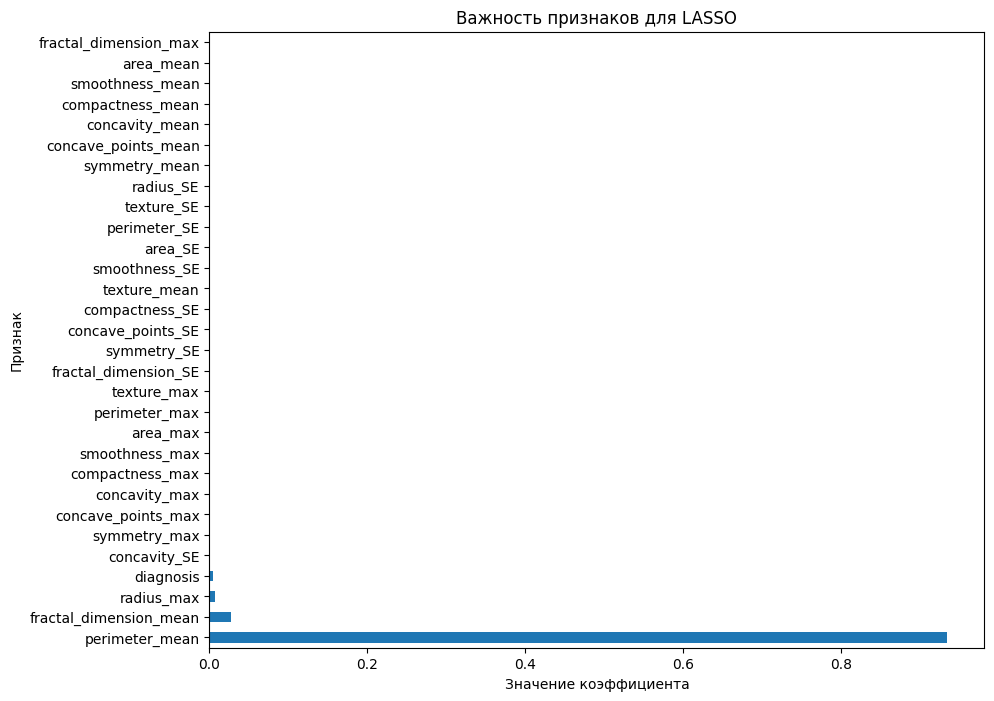

--- Elastic Net ---
Лучшие гиперпараметры: {'alpha': 0.001, 'l1_ratio': 0.9}
Средняя квадратичная ошибка (MSE): 7.173982297463573e-05
Средняя абсолютная ошибка (MAE): 0.006884038833616739
Коэффициент детерминации (R^2 Score): 0.9973658301943417
Коэффициенты регрессии: [-0.00411889  0.          0.85978357  0.03647877 -0.         -0.
 -0.          0.         -0.         -0.03141384  0.         -0.
  0.          0.         -0.         -0.         -0.         -0.
 -0.         -0.          0.05001292 -0.          0.          0.
 -0.         -0.         -0.          0.         -0.         -0.        ]
Свободный член (Intercept): 0.04036144433850375


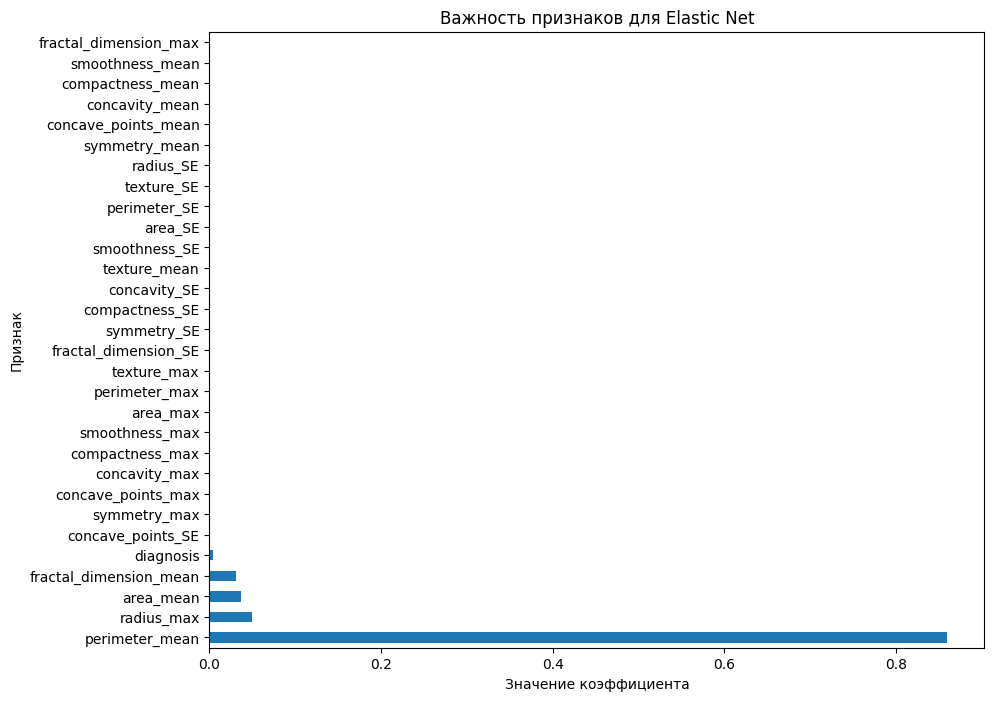

In [19]:
models = {'Ridge': [Ridge(),{'alpha': [0.001, 0.01, 0.1, 1, 10, 100]} ],
         'LASSO': [Lasso(),{'alpha': [0.001, 0.01, 0.1, 1, 10, 100]}],
         'Elastic Net': [ElasticNet(),{'alpha': [0.001, 0.01, 0.1, 1, 10, 100],'l1_ratio': [0.1, 0.3, 0.5, 0.7, 0.9]}]}
best_models_notCat  = func_grid(models,X_train, X_test, y_train, y_test)


5. Датасет и подготовка данных, этап 2:
   - Использовать датафреймы после разбиения на обучающую и тестовую выборки из 1 этапа с категориальными признаками.
   - Закодировать категориальные признаки в обучающей и тестовой выборках.
6. Регрессии, этап 2:
   - Обучить `LinearRegression`, лучшие модели `Ridge`, `LASSO`, `Elastic Net` на обучающем наборе с категориальными признаками.
   - Вывести значения гиперпараметров, коэффициенты регрессии (`model.coef_` и `model.intercept_`) и значения метрик на тестовом наборе ($MSE$, $MAE$ и $R^2$).
   - Сравнить метрики с наличием категориальных признаков и без для каждой из моделей.
   - Выбрать лучшую модель.
   - Построить график (`barh`) с важностью коэфициентов при соответствующих признаках (сверху вниз расположены коэффициенты по убыванию, а названия соответствующих признаков подписаны по вертикальной оси).
   - Осуществить фильтрацию признаков с использованием `Recursive Feature Elimination`.
   - Построить график (`barh`) с важностью коэфициентов при соответствующих признаках (сверху вниз расположены коэффициенты по убыванию, а названия соответствующих признаков подписаны по вертикальной оси).
   - Вывести значения метрик на тестовом наборе ($MSE$, $MAE$ и $R^2$).

In [20]:
X_train_cat = X_train.copy()
X_test_cat = X_test.copy()

In [23]:
X_train_cat['concave_points_mean'] = X_train_cat['concave_points_mean'].apply(lambda x: 1 if x> 0.5 else 0)
X_train_cat['area_mean'] = X_train_cat['area_mean'].apply(lambda x : 1 if x>0.5 else 0)
X_test_cat['concave_points_mean'] = X_test_cat['concave_points_mean'].apply(lambda x: 1 if x> 0.5 else 0)
X_test_cat['area_mean'] = X_test_cat['area_mean'].apply(lambda x : 1 if x>0.5 else 0)

--- Ridge ---
Лучшие гиперпараметры: {'alpha': 0.001}
Средняя квадратичная ошибка (MSE): 1.2920789446983355e-05
Средняя абсолютная ошибка (MAE): 0.002208271287154225
Коэффициент детерминации (R^2 Score): 0.9995255695927973
Коэффициенты регрессии: [ 1.02207550e-03 -1.06067842e-03  1.03197577e+00  1.57841366e-03
  6.93948695e-03 -6.94006413e-02 -2.61479796e-02 -2.54574461e-03
  2.97845742e-03  1.32180394e-02  2.27725358e-02 -7.23531403e-04
 -2.71095298e-02 -1.01313821e-02  3.85443865e-03 -1.00567128e-03
  2.23834797e-02  1.05406188e-03  5.53484082e-03 -7.90678804e-03
  1.67525939e-01  1.11604058e-03 -1.27210783e-01 -3.43847770e-02
 -5.00689527e-03  1.42011555e-02  1.20486919e-03  4.22617183e-03
 -2.20541976e-03 -4.80597521e-03]
Свободный член (Intercept): -0.0007450171237103342


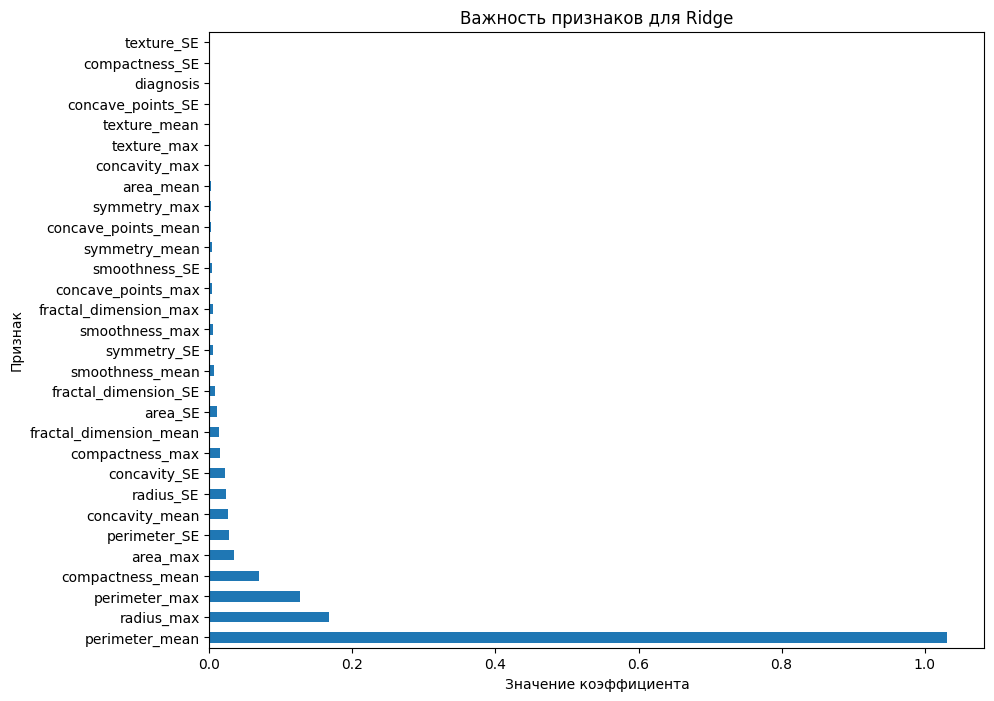

--- LASSO ---
Лучшие гиперпараметры: {'alpha': 0.001}
Средняя квадратичная ошибка (MSE): 8.302773797684974e-05
Средняя абсолютная ошибка (MAE): 0.007089122171607068
Коэффициент детерминации (R^2 Score): 0.9969513562852245
Коэффициенты регрессии: [-0.0041148   0.          0.93489575  0.         -0.         -0.
 -0.          0.         -0.         -0.02740927  0.         -0.
  0.          0.         -0.         -0.         -0.         -0.
 -0.         -0.          0.007436    0.          0.          0.
 -0.         -0.         -0.          0.         -0.         -0.        ]
Свободный член (Intercept): 0.034826261105827705


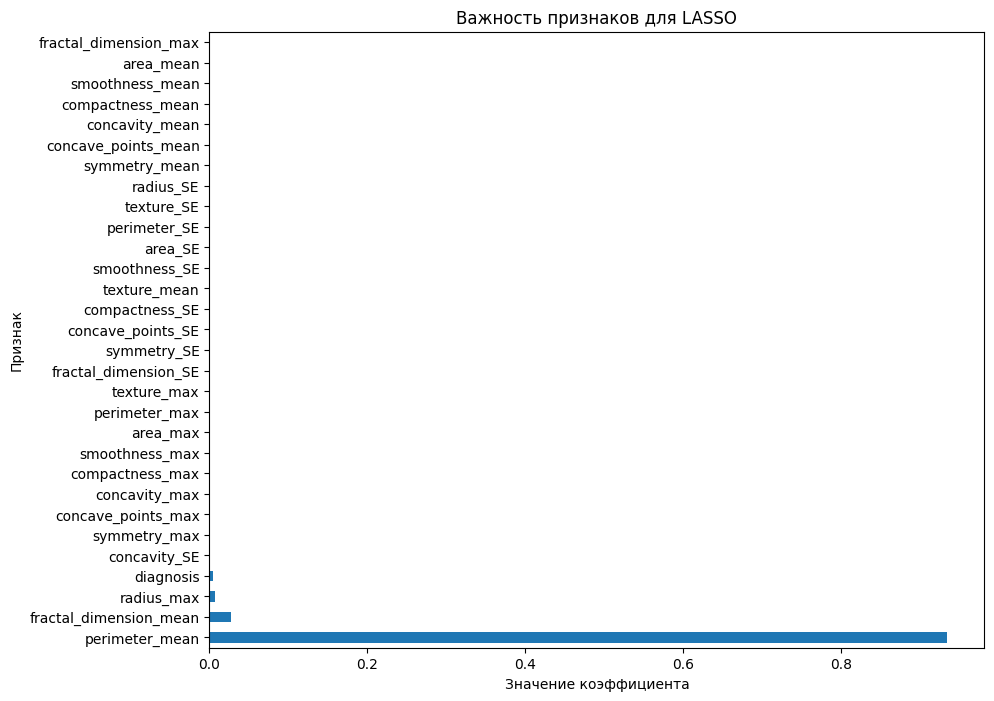

--- Elastic Net ---
Лучшие гиперпараметры: {'alpha': 0.001, 'l1_ratio': 0.9}
Средняя квадратичная ошибка (MSE): 7.166002943531018e-05
Средняя абсолютная ошибка (MAE): 0.006820857027186345
Коэффициент детерминации (R^2 Score): 0.9973687600835337
Коэффициенты регрессии: [-0.0033335   0.          0.88802555  0.         -0.         -0.
 -0.          0.         -0.         -0.03187907  0.         -0.
  0.          0.         -0.         -0.         -0.         -0.
 -0.         -0.          0.05543514 -0.          0.          0.
 -0.         -0.         -0.          0.         -0.         -0.        ]
Свободный член (Intercept): 0.03690262599875166


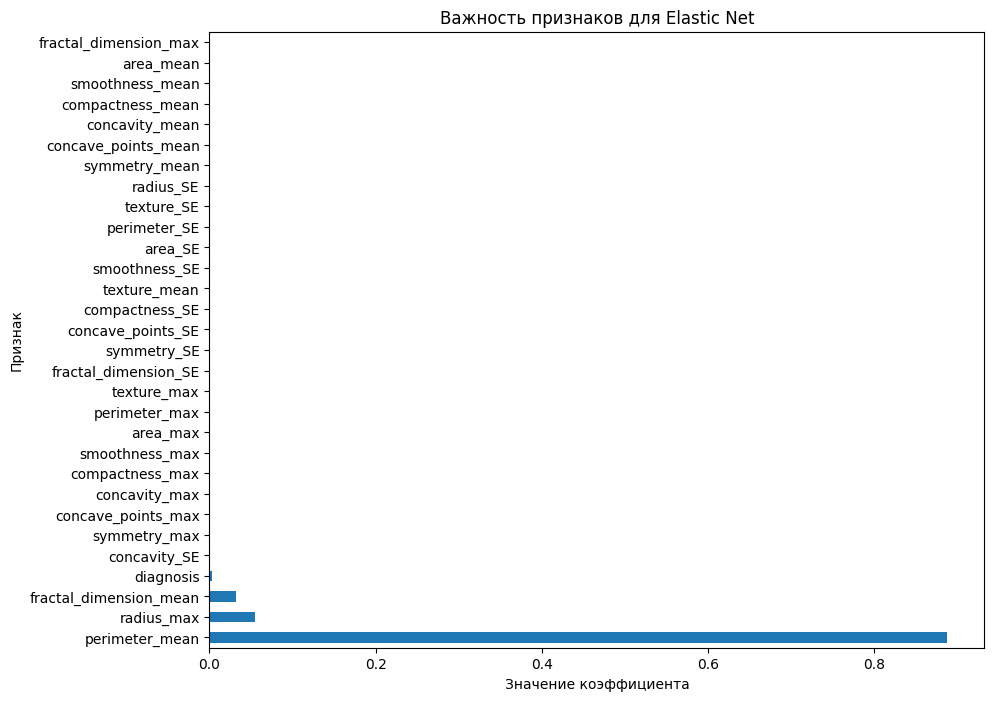

In [24]:
best_models_Cat  = func_grid(models,X_train_cat, X_test_cat, y_train, y_test)

In [25]:
best_models_Cat

{'Ridge': [Ridge(), {'alpha': 0.001}],
 'LASSO': [Lasso(), {'alpha': 0.001}],
 'Elastic Net': [ElasticNet(), {'alpha': 0.001, 'l1_ratio': 0.9}]}

In [26]:
best_models_notCat

{'Ridge': [Ridge(), {'alpha': 0.001}],
 'LASSO': [Lasso(), {'alpha': 0.001}],
 'Elastic Net': [ElasticNet(), {'alpha': 0.001, 'l1_ratio': 0.9}]}

7. Сделать вывод:
   - Лучший регрессор, обученный на данных без категориальных признаков (значения метрик на тестовом наборе).
   - Лучший регрессор, обученный на данных с категориальными признаками (значения метрик на тестовом наборе).
   - Вывод о результатах использования `Recursive Feature Elimination` (лучше или хуже - значения метрик).

In [34]:
best_model_notCat = None
best_metrics_notCat = float('-inf')  

for name, [model, params] in best_models_notCat.items():
    
    model.set_params(**params)
    
    model.fit(X_train, y_train)
    
    
    y_pred = model.predict(X_test)
    
   
    r2 = r2_score(y_test, y_pred)

    
    total_metrics =  r2
    
    if total_metrics > best_metrics_notCat:
        best_metrics_notCat = total_metrics
        best_model_notCat = model




In [35]:
print("Лучший регрессор, обученный на данных без категориальных признаков (значения метрик на тестовом наборе).")
best_model_notCat

Лучший регрессор, обученный на данных без категориальных признаков (значения метрик на тестовом наборе).


Ridge(alpha=0.001)

In [36]:
best_metrics_notCat

0.9996185586268196

In [37]:
best_model_Cat = None
best_metrics_Cat = float('-inf')  

for name, [model, params] in best_models_Cat.items():
    
    model.set_params(**params)
    
    model.fit(X_train_cat, y_train)
    
    
    y_pred = model.predict(X_test_cat)
    
   
    r2 = r2_score(y_test, y_pred)

    
    total_metrics = r2
    
    if total_metrics > best_metrics_Cat:
        best_metrics_Cat = total_metrics
        best_model_Cat = model




In [38]:
print("Лучший регрессор, обученный на данных с категориальными признаками (значения метрик на тестовом наборе).")
best_model_Cat

Лучший регрессор, обученный на данных с категориальными признаками (значения метрик на тестовом наборе).


Ridge(alpha=0.001)

In [39]:
best_metrics_Cat

0.9995255695927973